# GUIDED IMAGE FILTERING

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def guided_filter(I, p, radius, eps):
    mean_I = cv2.boxFilter(I, cv2.CV_64F, (radius, radius))
    mean_p = cv2.boxFilter(p, cv2.CV_64F, (radius, radius))
    mean_Ip = cv2.boxFilter(I * p, cv2.CV_64F, (radius, radius))
    cov_Ip = mean_Ip - mean_I * mean_p

    mean_II = cv2.boxFilter(I * I, cv2.CV_64F, (radius, radius))
    var_I = mean_II - mean_I * mean_I

    a = cov_Ip / (var_I + eps)
    b = mean_p - a * mean_I

    mean_a = cv2.boxFilter(a, cv2.CV_64F, (radius, radius))
    mean_b = cv2.boxFilter(b, cv2.CV_64F, (radius, radius))

    q = mean_a * I + mean_b
    return q

# Load the input and guidance images
input_image = cv2.imread('C:\JN\chaubey/sp12/0136.jpg')
guidance_image = cv2.imread('C:\JN\chaubey/sp12/0136.jpg')

# Convert images to float32
input_image = np.float32(input_image) / 255.0
guidance_image = np.float32(guidance_image) / 255.0

# Splitting the input image into RGB channels
b, g, r = cv2.split(input_image)

# Perform guided filtering on each channel using the corresponding channel of the guidance image
radius = 9
eps = 0.2
guided_b = guided_filter(b, guidance_image[:,:,0], radius, eps)
guided_g = guided_filter(g, guidance_image[:,:,1], radius, eps)
guided_r = guided_filter(r, guidance_image[:,:,2], radius, eps)

# Merge the filtered channels
guided_image = cv2.merge((guided_b, guided_g, guided_r))




In [5]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'input gray image')

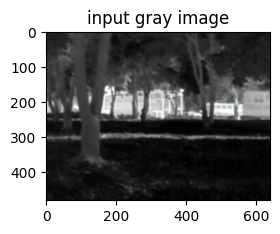

In [4]:
plt.subplot(2, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('input gray image')

Text(0.5, 1.0, 'guidence image')

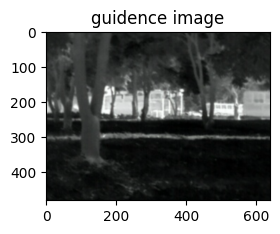

In [7]:
plt.subplot(2, 2, 1)
plt.imshow(guidance_image, cmap='gray')
plt.title('guidence image')

Text(0.5, 1.0, 'output image using guided image filtering')

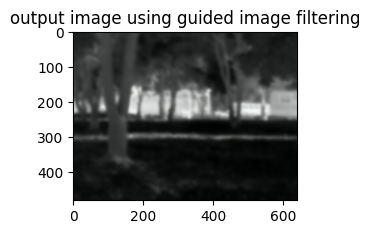

In [8]:
plt.subplot(2, 2, 1)
plt.imshow(guided_image, cmap='gray')
plt.title('output image using guided image filtering')

In [3]:
# Calculate PSNR for different radius values
radius_values = [3, 5, 7, 9,11, 13]
eps = 0.2

for radius in radius_values:
# Perform guided filtering
    filtered_image = guided_filter(guided_image, input_image, radius, eps)
    
    # Calculate PSNR
    mse = np.mean((input_image - filtered_image) ** 2)
    psnr = 20 * np.log10(1.0 / np.sqrt(mse))
    
    print(f'PSNR for radius {radius}: {psnr:.2f} dB')

PSNR for radius 3: 43.63 dB
PSNR for radius 5: 36.34 dB
PSNR for radius 7: 32.44 dB
PSNR for radius 9: 30.03 dB
PSNR for radius 11: 28.39 dB
PSNR for radius 13: 27.19 dB


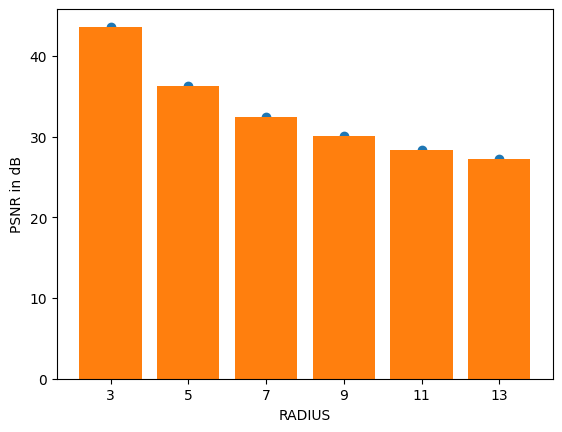

In [10]:
x = np.array(["3", "5", "7", "9","11","13"])

y = np.array([43.63, 36.34, 32.44, 30.03, 28.39,27.19])


plt.xlabel("RADIUS")
plt.ylabel("PSNR in dB")
plt.scatter(x, y)
plt.bar(x,y)
plt.show()

In [2]:
import time
# Measure computational time
start_time = time.time()

# Perform guided filtering
filtered_image = guided_filter(guidance_image,input_image, radius, eps)

# Calculate computational time
end_time = time.time()
computational_time = end_time - start_time

print(f"Computational time for guided filtering: {computational_time:.4f} seconds")


Computational time for guided filtering: 0.1019 seconds
